In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
import os
import matplotlib
from matplotlib.ticker import MultipleLocator, FormatStrFormatter

In [2]:

sns.set_context("paper")

color_set=['deep','muted','pastel','bright','dark','colorblind']
sns.set_palette(color_set[1])




large=12
med=9
small=6
ss=10
sss=8
ssss=6



matplotlib.rcParams['figure.figsize']=(3.2,2.8)
matplotlib.rcParams['figure.dpi'] = 600

matplotlib.rcParams['font.sans-serif'] = ['Arial']   
matplotlib.rcParams['font.family']='sans-serif'
matplotlib.rcParams['font.style']='normal'   # normal (or roman), italic or oblique
matplotlib.rcParams['font.weight']='bold'   # normal bold bolder lighter, 100, 200, 300, ..., 900
matplotlib.rcParams["axes.labelweight"] = "bold"

matplotlib.rcParams['axes.titlesize'] =sss
#matplotlib.rcParams['axes.titlepad'] =-0.5
matplotlib.rcParams['legend.fontsize'] =sss
matplotlib.rcParams['axes.labelsize'] =ss
matplotlib.rcParams['xtick.labelsize'] =ss
matplotlib.rcParams['ytick.labelsize'] = ss
matplotlib.rcParams['figure.titlesize'] =sss


matplotlib.rcParams['xtick.major.width'] = 0.6
matplotlib.rcParams['ytick.major.width'] = 0.6

matplotlib.rcParams['xtick.major.size'] = 1.3
matplotlib.rcParams['ytick.major.size'] = 1.3

matplotlib.rcParams['xtick.major.pad'] = 1.5
matplotlib.rcParams['ytick.major.pad'] = 1.5


matplotlib.rcParams['axes.linewidth'] = 0.6

matplotlib.rcParams['lines.linewidth'] = 1.0
#matplotlib.rcParams['lines.markersize'] = 1.2

scatter_s=20


ref_line_color=['#4d4d4d', 'red']
ref_line_size=0.8


#matplotlib.rcParams['xtick.direction'] = 'in'

In [3]:
data_train = pd.read_excel('data_train.xlsx')
data_test = pd.read_excel('data_test.xlsx')
data_final_test = pd.read_excel('data_final_test.xlsx')

In [4]:
#print(data_train.info())
#print(data_test.info())

#data_train = data_train.astype(float)
#data_test = data_test.astype(float)

In [5]:

X_train = data_train.iloc[:,1:]
y_train = data_train.iloc[:,0]

X_col = X_train.columns


X_test = data_test.iloc[:,1:]
y_test = data_test.iloc[:,0]


X_final_test = data_final_test.iloc[:,1:]
y_final_test = data_final_test.iloc[:,0]

In [6]:

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
#scaler = MinMaxScaler()
scaler = StandardScaler()

scaler.fit(X_train)  

X_train_standard = scaler.transform(X_train)
X_test_standard = scaler.transform(X_test)

X_train_standard = pd.DataFrame(X_train_standard,columns=X_col)
X_test_standard = pd.DataFrame(X_test_standard,columns=X_col)

In [7]:
X_train_standard_np = X_train_standard.values
X_test_standard_np = X_test_standard.values
y_train_np = y_train.values
y_test_np = y_test.values
y_final_test_np = y_final_test.values

Mean Absolute Error MAE: 0.005407081382251844
test rmse scores :  0.007054666111851603
test R2 scores :  0.9800414793739202


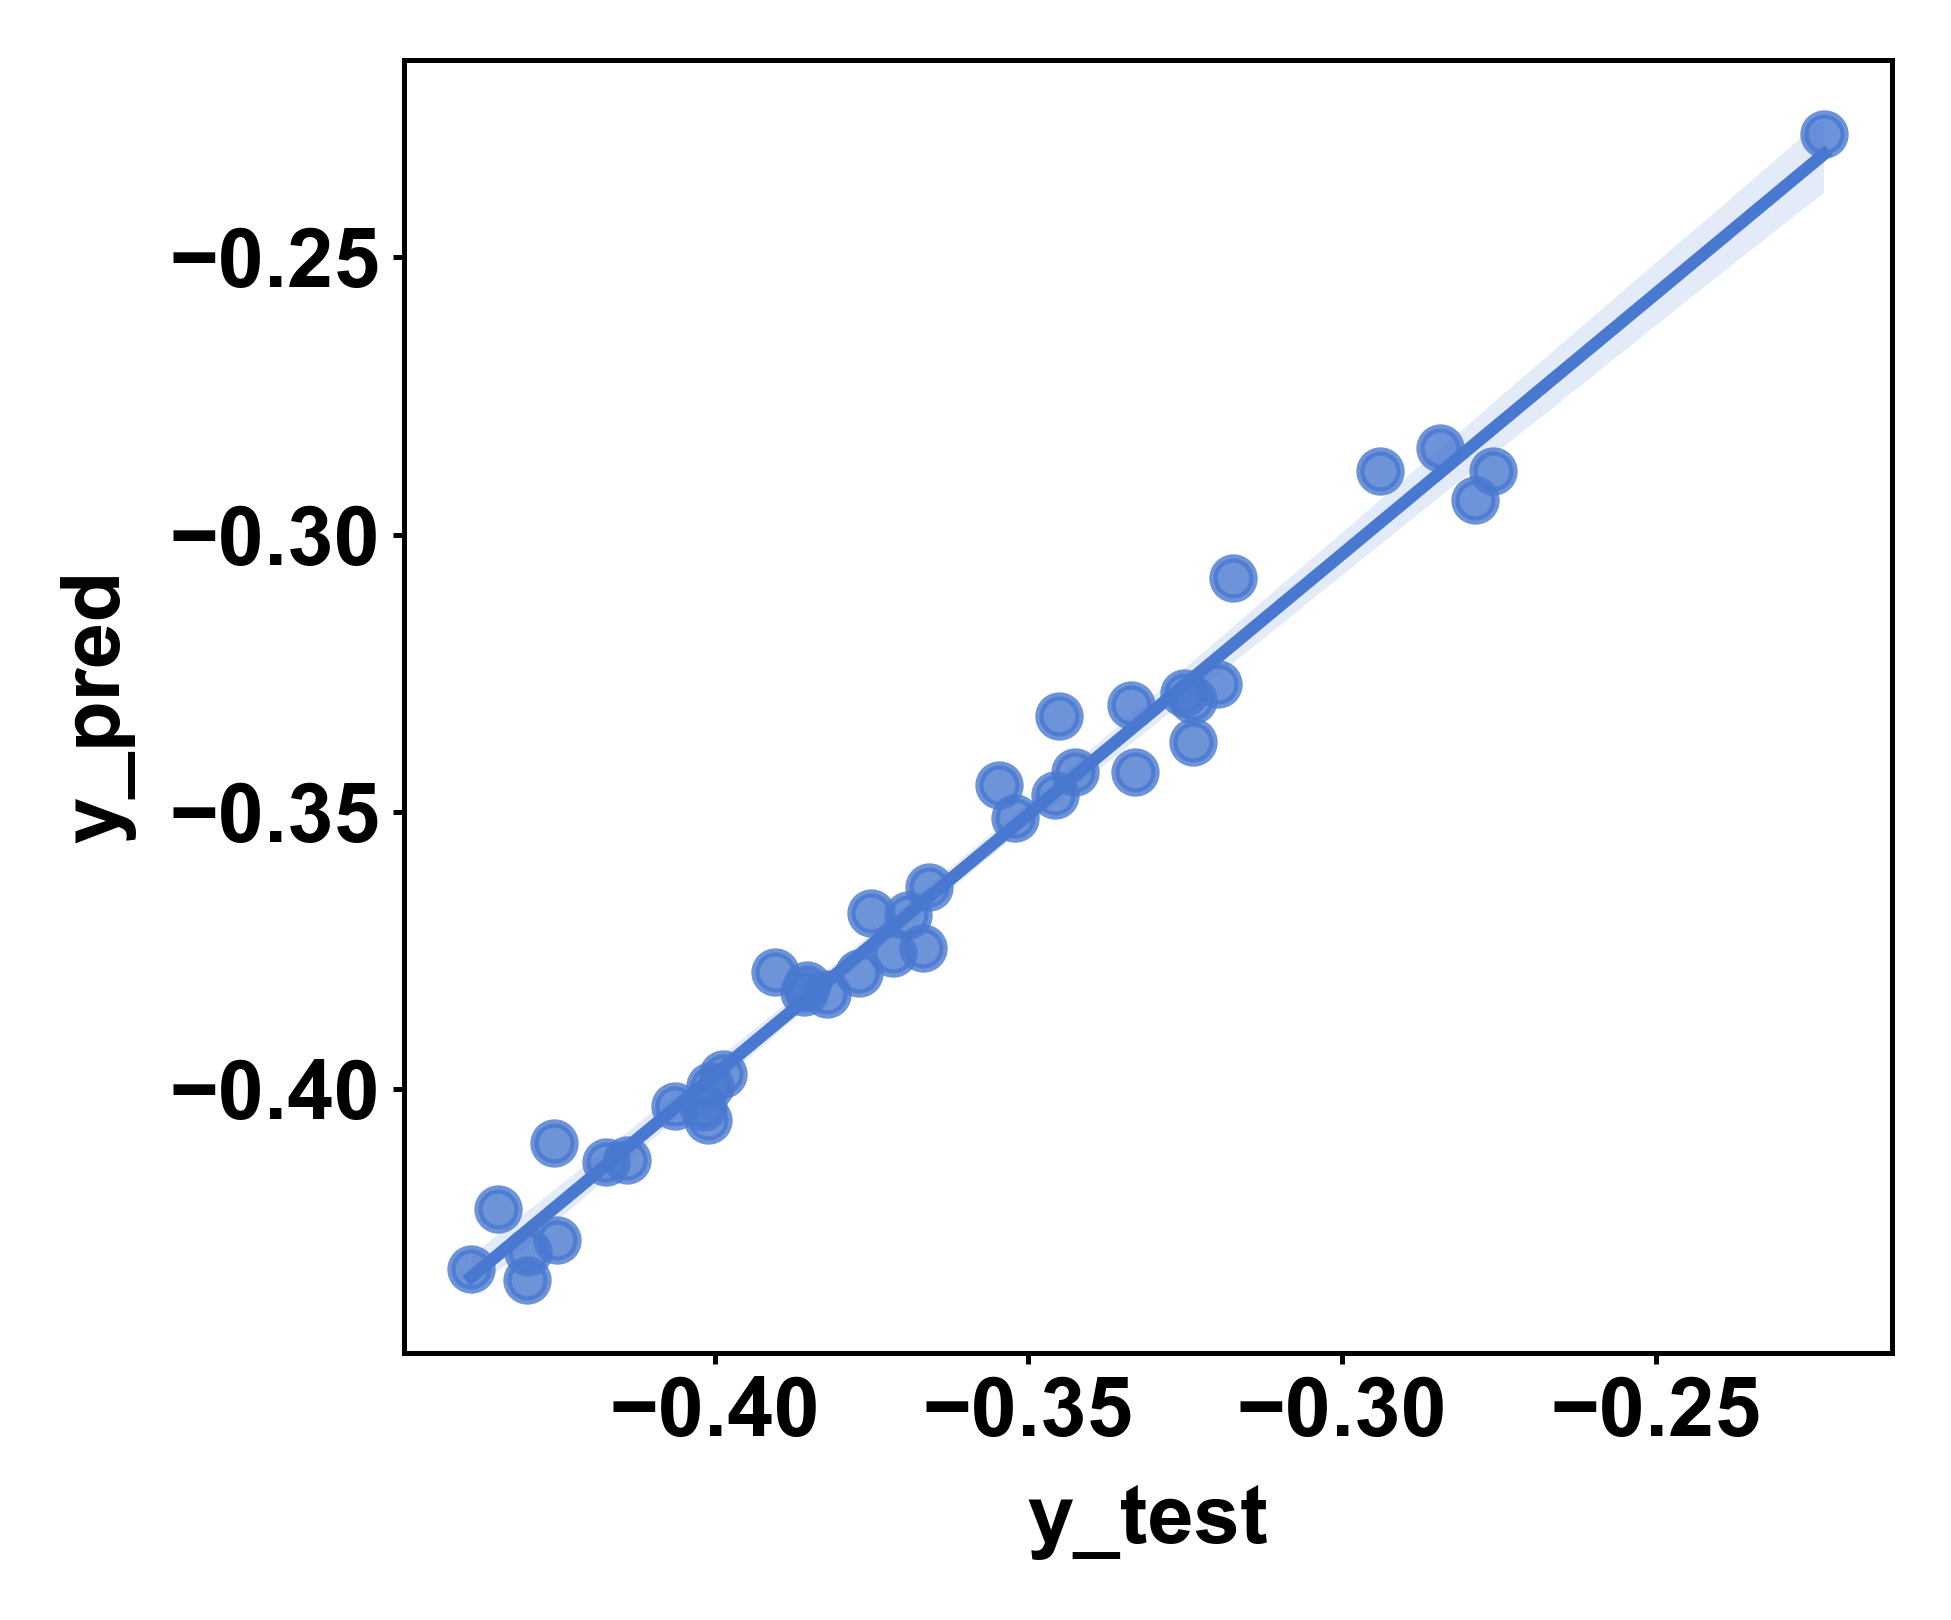

In [8]:

from sklearn.linear_model import Ridge
Ridge_default = Ridge()
Ridge_default.fit(X_train_standard_np,y_train_np)
y_pred_default=Ridge_default.predict(X_test_standard_np)


x_1,y_1=pd.Series(y_test_np,name='y_test'),pd.Series(y_pred_default,name='y_pred')
sns.regplot(x=x_1,y=y_1)
plt.show

#rmse_log = np.sqrt(mean_squared_error(np.log(y_test),np.log(abs(y_pred))))
rmse = np.sqrt(mean_squared_error(y_test_np,y_pred_default))
r2 = r2_score(y_test_np,y_pred_default)


print(f'Mean Absolute Error MAE: {mean_absolute_error(y_test_np,y_pred_default)}')
print ('test rmse scores : ',rmse)
print ('test R2 scores : ',r2)

In [9]:
print(Ridge_default.get_params())

{'alpha': 1.0, 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'positive': False, 'random_state': None, 'solver': 'auto', 'tol': 0.0001}


In [10]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold


alphas = np.logspace(-6, 6, 13)
r2_scores_totle = []
alpha_storage = []
screen_data =[]
kf = KFold(n_splits=5, shuffle=True, random_state=1 )

for i in alphas:
    RI_KF = Ridge(alpha=i)
    alpha_storage.append(i)
    r2_scores = []
    for train, test in kf.split(X_train_standard_np):
        X_train_k, X_test_k = X_train_standard_np[train], X_train_standard_np[test]
        y_train_k, y_test_k = y_train_np[train], y_train_np[test]
        RI_KF.fit(X_train_k,y_train_k)
        y_pred_k=RI_KF.predict(X_test_k)
        r2 = r2_score(y_test_k,y_pred_k)
        r2_scores.append(r2)
    print(i)
    print(r2_scores)
    average = np.mean(r2_scores)
    screen_data.append({i:average})
    r2_scores_totle.append(r2_scores)

max_data = max(screen_data, key=lambda x: list(x.values())[0])
x=float(list(max_data.keys())[0])
print(x)

1e-06
[0.9742621158828504, 0.9724228105995252, 0.9653858559830885, 0.949947463056745, 0.9623942610857903]
1e-05
[0.9742620949646448, 0.9724228169102906, 0.9653858658731285, 0.9499474872049806, 0.9623942626076744]
0.0001
[0.9742618857914092, 0.9724228800088289, 0.9653859647630352, 0.9499477286663716, 0.9623942778209599]
0.001
[0.9742597949406658, 0.9724235100833735, 0.9653869526134201, 0.9499501411860622, 0.9623944293987192]
0.01
[0.9742389742142787, 0.9724297204033141, 0.9653967268923852, 0.9499740591460152, 0.9623958900608479]
0.1
[0.9740391753953833, 0.972483395003713, 0.9654846521906235, 0.9501945113360206, 0.9624053536187153]
1.0
[0.9726081274264101, 0.9725296787009772, 0.965750770246388, 0.9515256799769674, 0.9622002813330754]
10.0
[0.9649674678936875, 0.9646001836018944, 0.9571563479901527, 0.9554310814181102, 0.9551208429857041]
100.0
[0.8857907511454338, 0.8516750098063439, 0.8374538305839996, 0.8891245226696527, 0.8432900036985727]
1000.0
[0.4634254385807962, 0.374454466111002

In [11]:

data = pd.read_excel('data_final.xlsx')


#data = data.astype(float)
#data.info()


X_all = data.iloc[:,1:]
X_all_colums=X_all.columns
y_all = data.iloc[:,0]


X_all_np=X_all.values
y_all_np=y_all.values

In [12]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler_all = StandardScaler()
RI_all = Ridge(alpha=float(list(max_data.keys())[0]))


feature_imp_set=[]
feature_imp_set_noabs=[]


train_rmse_scores = []
train_r2_scores = []
train_mae_scores = []

test_rmse_scores = []
test_r2_scores = []
test_mae_scores = []

final_test_rmse_scores = []
final_test_r2_scores = []
final_test_mae_scores = []


n = 20

####################
for i in range(n):
    X_all_train, X_all_test, y_all_train, y_all_test = train_test_split(X_all, y_all, test_size=0.2, shuffle=True, random_state=i)

    
    scaler_all.fit(X_all_train)
    X_all_train_standard = scaler_all.transform(X_all_train)
    X_all_test_standard = scaler_all.transform(X_all_test)
    X_final_test_standard_all = scaler_all.transform(X_final_test)
    
    RI_all.fit(X_all_train_standard, y_all_train)

    y_all_train_pred = RI_all.predict(X_all_train_standard)
    train_rmse = np.sqrt(mean_squared_error(y_all_train, y_all_train_pred))
    train_rmse_scores.append(train_rmse)
    train_r2 = r2_score(y_all_train, y_all_train_pred)
    train_r2_scores.append(train_r2)
    train_mae = mean_absolute_error(y_all_train, y_all_train_pred)
    train_mae_scores.append(train_mae)

    y_all_test_pred = RI_all.predict(X_all_test_standard)
    test_rmse = np.sqrt(mean_squared_error(y_all_test, y_all_test_pred))
    test_rmse_scores.append(test_rmse)
    test_r2 = r2_score(y_all_test, y_all_test_pred)
    test_r2_scores.append(test_r2)
    test_mae = mean_absolute_error(y_all_test, y_all_test_pred)
    test_mae_scores.append(test_mae)

    y_final_test_pred_all = RI_all.predict(X_final_test_standard_all)
    test_rmse = np.sqrt(mean_squared_error(y_final_test_np, y_final_test_pred_all))
    final_test_rmse_scores.append(test_rmse)
    test_r2 = r2_score(y_final_test_np, y_final_test_pred_all)
    final_test_r2_scores.append(test_r2)
    test_mae = mean_absolute_error(y_final_test_np, y_final_test_pred_all)
    final_test_mae_scores.append(test_mae)

    feature_imp=RI_all.coef_
    feature_imp_abs=np.abs(feature_imp)
    feature_imp_set_noabs.append(feature_imp)
    feature_imp_set.append(feature_imp_abs)
################################


results_dict = {
    'method': ['RI'] * (3 * n),
    'set_type': ['Train'] * n + ['Test'] * n + ['Final_Test'] * n,
    'MAE': train_mae_scores + test_mae_scores + final_test_mae_scores,
    'RMSE': train_rmse_scores + test_rmse_scores + final_test_rmse_scores,
    'R2': train_r2_scores + test_r2_scores + final_test_r2_scores
}
results_df = pd.DataFrame(results_dict)

excel_filename = 'model_evaluation_results_all.xlsx'
results_df.to_excel(excel_filename, index=False)

In [13]:

print('train set')
print(f'Average MAE score: {np.mean(train_mae_scores):.4f} ± {np.std(train_mae_scores):.4f}')
print(f'Average RMSE score: {np.mean(train_rmse_scores):.4f} ± {np.std(train_rmse_scores):.4f}')
print(f'Average R2 score: {np.mean(train_r2_scores):.4f} ± {np.std(train_r2_scores):.4f}')

print('\ntest set')
print(f'Average MAE score: {np.mean(test_mae_scores):.4f} ± {np.std(test_mae_scores):.4f}')
print(f'Average RMSE score: {np.mean(test_rmse_scores):.4f} ± {np.std(test_rmse_scores):.4f}')
print(f'Average R2 score: {np.mean(test_r2_scores):.4f} ± {np.std(test_r2_scores):.4f}')

print('\nindependent test set:')
print(f'Average MAE score: {np.mean(final_test_mae_scores):.4f} ± {np.std(final_test_mae_scores):.4f}')
print(f'Average RMSE score: {np.mean(final_test_rmse_scores):.4f} ± {np.std(final_test_rmse_scores):.4f}')
print(f'Average R2 score: {np.mean(final_test_r2_scores):.4f} ± {np.std(final_test_r2_scores):.4f}')

print(f'\nResults have been saved to {excel_filename}')

#可选：显示数据框的前几行，确认格式正确
print('\nDataFrame preview:')
print(results_df.head())


#打印测试集的最好的评估结果
print('best test set')
min_mae = min(test_mae_scores)
min_mae_index = test_mae_scores.index(min_mae)
print('min MAE score:', min_mae, '    ', 'random_state=', min_mae_index)

min_rmse = min(test_rmse_scores)
min_rmse_index = test_rmse_scores.index(min_rmse)
print('min RMSE score:', min_rmse, '    ', 'random_state=', min_rmse_index)

max_r2 = max(test_r2_scores)
max_r2_index = test_r2_scores.index(max_r2)
print('max R2 score:', max_r2, '    ', 'random_state=', max_r2_index)

print('best insependent test set')
final_min_mae = min(final_test_mae_scores)
final_min_mae_index = final_test_mae_scores.index(final_min_mae)
print('min MAE score:', final_min_mae, '    ', 'random_state=', final_min_mae_index)

final_min_rmse = min(final_test_rmse_scores)
final_min_rmse_index = final_test_rmse_scores.index(final_min_rmse)
print('min RMSE score:', final_min_rmse, '    ', 'random_state=', final_min_rmse_index)

final_max_r2 = max(final_test_r2_scores)
final_max_r2_index = final_test_r2_scores.index(final_max_r2)
print('max R2 score:', final_max_r2, '    ', 'random_state=', final_max_r2_index)

train set
Average MAE score: 0.0055 ± 0.0001
Average RMSE score: 0.0066 ± 0.0001
Average R2 score: 0.9732 ± 0.0016

test set
Average MAE score: 0.0056 ± 0.0005
Average RMSE score: 0.0068 ± 0.0005
Average R2 score: 0.9720 ± 0.0071

independent test set:
Average MAE score: 0.0059 ± 0.0002
Average RMSE score: 0.0075 ± 0.0001
Average R2 score: 0.9190 ± 0.0032

Results have been saved to model_evaluation_results_all.xlsx

DataFrame preview:
  method set_type       MAE      RMSE        R2
0     RI    Train  0.005500  0.006682  0.971986
1     RI    Train  0.005514  0.006554  0.970349
2     RI    Train  0.005642  0.006714  0.971684
3     RI    Train  0.005408  0.006622  0.972486
4     RI    Train  0.005483  0.006633  0.971542
best test set
min MAE score: 0.004954068464084076      random_state= 13
min RMSE score: 0.006106072065543457      random_state= 7
max R2 score: 0.9800414793739202      random_state= 1
best insependent test set
min MAE score: 0.00562574711939341      random_state= 3
min RM

   feature  average_importance     error
9    MSD_E            0.000754  0.000787
0     Mo_P            0.000806  0.000382
5    AVE_R            0.001052  0.000428
3      W_P            0.002122  0.000402
10   MSD_M            0.002358  0.000339
11   S_MIX            0.002536  0.000374
2     Rh_P            0.002741  0.000516
6    AVE_E            0.003287  0.000484
4     Ir_P            0.006118  0.000473
7    AVE_M            0.007050  0.000305
8    MSD_R            0.008400  0.000884
1     Ru_P            0.010295  0.000294
12   H_MIX            0.027398  0.000969


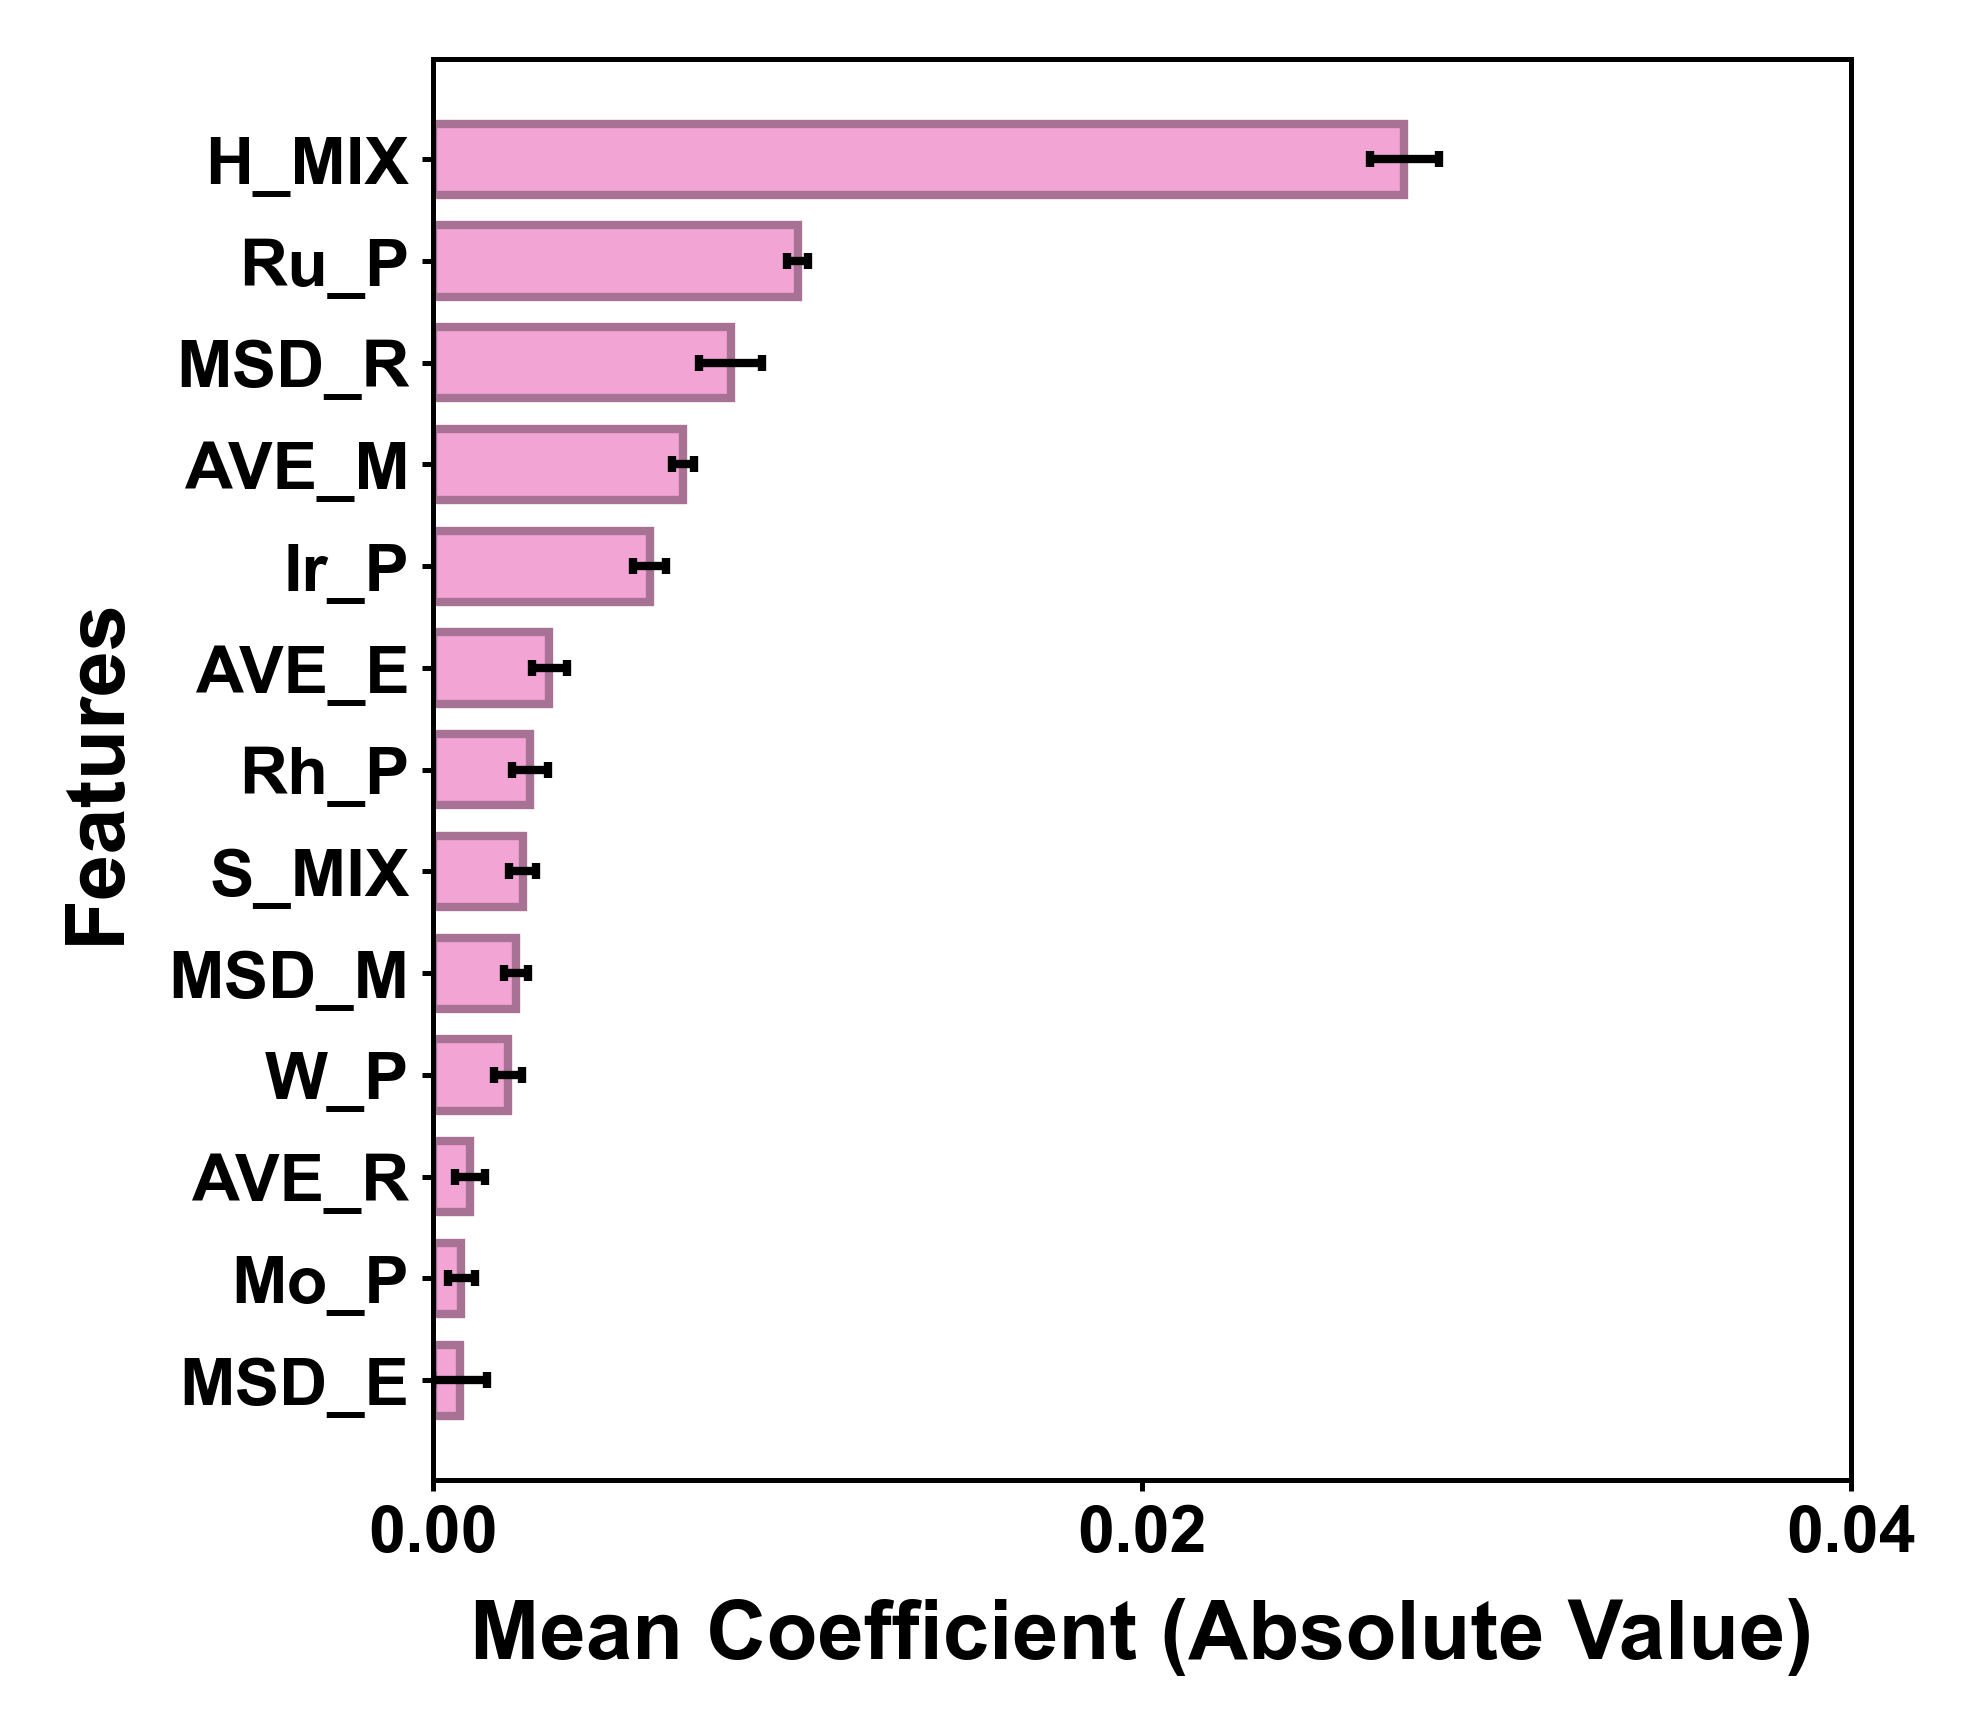

In [14]:
feature_imp_set=np.array(feature_imp_set)    

f_mean = np.mean(feature_imp_set, axis=0)
f_error=np.std(feature_imp_set, axis=0)


feature_importance=pd.concat((pd.DataFrame(X_col,columns=['feature']),
                              #pd.DataFrame(RFR_all.feature_importances_,columns=['importance']),
                              pd.DataFrame(f_mean,columns=['average_importance']),
                              pd.DataFrame(f_error,columns=['error'])),
                             axis=1).sort_values(by='average_importance',ascending=True)


print(feature_importance)

###############################################################################################

matplotlib.rcParams['ytick.labelsize'] = sss
matplotlib.rcParams['xtick.labelsize'] = sss

fig = plt.figure()

ax=fig.add_subplot(111)

#plt.barh(feature_importance['feature'], feature_importance['importance'],
#                       height=0.7, color='#8CC2FB', edgecolor='#073E8E')


ax.barh(feature_importance['feature'], feature_importance['average_importance'], xerr=feature_importance['error'], capsize=1,
        height=0.7, color='#f2a4d5', edgecolor='#a77293',linewidth=1)


ax.set_xlabel('Mean Coefficient (Absolute Value)')
ax.set_ylabel('Features')
#plt.title('Feature Importances')


ax.set_xlim([0,0.04])
ax.xaxis.set_ticks(np.arange(0, 0.04, 0.02))


xmajorLocator   = MultipleLocator(0.02) 
ax.xaxis.set_major_locator(xmajorLocator)


#for i, v in enumerate(feature_importance['average_importance']):
#    ax.text(v + 0.002, i, f'{v:.4f}', va='center', fontsize=8)




#fig.tight_layout()
fig.tight_layout(pad=0.4, w_pad=1.0, h_pad=1.0)

#plt.savefig('feature_importance_'+str(n)+'_all.pdf')
plt.show()

In [15]:
FEATURE_NAMES = ['H_MIX','Ru_P','MSD_R','AVE_M','Ir_P','AVE_E','Rh_P','S_MIX','MSD_M','W_P','AVE_R','Mo_P','MSD_E']

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_FEA = pd.DataFrame(index=X_all.index)
X_FEA_final_test = pd.DataFrame(index=X_final_test.index)

for feature in FEATURE_NAMES:
    if feature not in X_FEA.columns:
        X_FEA = pd.concat([X_FEA, X_all[[feature]]], axis=1)
        X_FEA_final_test = pd.concat([X_FEA_final_test, X_final_test[[feature]]], axis=1)
    
    scaler_FEA = StandardScaler()
    
    RI_FEA = Ridge(alpha=float(list(max_data.keys())[0]))

    
    train_rmse_scores = []
    train_r2_scores = []
    train_mae_scores = []

    test_rmse_scores = []
    test_r2_scores = []
    test_mae_scores = []

    final_test_rmse_scores = []
    final_test_r2_scores = []
    final_test_mae_scores = []

    n = 20
    for i in range(n):
        X_FEA_train, X_FEA_test, y_FEA_train, y_FEA_test = train_test_split(
            X_FEA, y_all, test_size=0.2, shuffle=True, random_state=i)

       
        scaler_FEA.fit(X_FEA_train)
        X_FEA_train_standard = scaler_FEA.transform(X_FEA_train)
        X_FEA_test_standard = scaler_FEA.transform(X_FEA_test)
        X_FEA_final_test_standard = scaler_FEA.transform(X_FEA_final_test)

        
        RI_FEA.fit(X_FEA_train_standard, y_FEA_train)

       
        y_train_pred = RI_FEA.predict(X_FEA_train_standard)
        train_rmse = np.sqrt(mean_squared_error(y_FEA_train, y_train_pred))
        train_rmse_scores.append(train_rmse)
        train_r2 = r2_score(y_FEA_train, y_train_pred)
        train_r2_scores.append(train_r2)
        train_mae = mean_absolute_error(y_FEA_train, y_train_pred)
        train_mae_scores.append(train_mae)

        
        y_test_pred = RI_FEA.predict(X_FEA_test_standard)
        test_rmse = np.sqrt(mean_squared_error(y_FEA_test, y_test_pred))
        test_rmse_scores.append(test_rmse)
        test_r2 = r2_score(y_FEA_test, y_test_pred)
        test_r2_scores.append(test_r2)
        test_mae = mean_absolute_error(y_FEA_test, y_test_pred)
        test_mae_scores.append(test_mae)

        
        y_final_test_pred = RI_FEA.predict(X_FEA_final_test_standard)
        final_rmse = np.sqrt(mean_squared_error(y_final_test_np, y_final_test_pred))
        final_test_rmse_scores.append(final_rmse)
        final_r2 = r2_score(y_final_test_np, y_final_test_pred)
        final_test_r2_scores.append(final_r2)
        final_mae = mean_absolute_error(y_final_test_np, y_final_test_pred)
        final_test_mae_scores.append(final_mae)

    # 打印评估结果
    print(f'feature number：{X_FEA.shape[1]}')
    print('train set:')
    print(f'Average MAE score: {np.mean(train_mae_scores):.4f} ± {np.std(train_mae_scores):.4f}')
    print(f'Average RMSE score: {np.mean(train_rmse_scores):.4f} ± {np.std(train_rmse_scores):.4f}')
    print(f'Average R2 score: {np.mean(train_r2_scores):.4f} ± {np.std(train_r2_scores):.4f}')

    print('\ntest set:')
    print(f'Average MAE score: {np.mean(test_mae_scores):.4f} ± {np.std(test_mae_scores):.4f}')
    print(f'Average RMSE score: {np.mean(test_rmse_scores):.4f} ± {np.std(test_rmse_scores):.4f}')
    print(f'Average R2 score: {np.mean(test_r2_scores):.4f} ± {np.std(test_r2_scores):.4f}')

    print('\nindepedent test set:')
    print(f'Average MAE score: {np.mean(final_test_mae_scores):.4f} ± {np.std(final_test_mae_scores):.4f}')
    print(f'Average RMSE score: {np.mean(final_test_rmse_scores):.4f} ± {np.std(final_test_rmse_scores):.4f}')
    print(f'Average R2 score: {np.mean(final_test_r2_scores):.4f} ± {np.std(final_test_r2_scores):.4f}')
    print('\n' + '-'*50 + '\n')

feature number：1
train set:
Average MAE score: 0.0206 ± 0.0004
Average RMSE score: 0.0252 ± 0.0004
Average R2 score: 0.6099 ± 0.0209

test set:
Average MAE score: 0.0208 ± 0.0018
Average RMSE score: 0.0252 ± 0.0017
Average R2 score: 0.6207 ± 0.0905

indepedent test set:
Average MAE score: 0.0133 ± 0.0004
Average RMSE score: 0.0157 ± 0.0004
Average R2 score: 0.6442 ± 0.0166

--------------------------------------------------

feature number：2
train set:
Average MAE score: 0.0119 ± 0.0002
Average RMSE score: 0.0147 ± 0.0002
Average R2 score: 0.8675 ± 0.0066

test set:
Average MAE score: 0.0122 ± 0.0009
Average RMSE score: 0.0152 ± 0.0009
Average R2 score: 0.8635 ± 0.0303

indepedent test set:
Average MAE score: 0.0105 ± 0.0002
Average RMSE score: 0.0126 ± 0.0003
Average R2 score: 0.7724 ± 0.0105

--------------------------------------------------

feature number：3
train set:
Average MAE score: 0.0103 ± 0.0002
Average RMSE score: 0.0126 ± 0.0002
Average R2 score: 0.9024 ± 0.0067

test set

In [17]:

FEATURE_NAMES = ['H_MIX','Ru_P','MSD_R','AVE_M','Ir_P','AVE_E','Rh_P','S_MIX','MSD_M','W_P','AVE_R','Mo_P','MSD_E']


results = []
excel_results = []


X_FEA = pd.DataFrame(index=X_all.index)
X_FEA_final_test = pd.DataFrame(index=X_final_test.index)


alpha = float(list(max_data.keys())[0])

for k, feature in enumerate(FEATURE_NAMES, start=1):

    X_FEA[feature] = X_all[feature]
    X_FEA_final_test[feature] = X_final_test[feature]


    train_mae_scores = []
    train_rmse_scores = []
    train_r2_scores = []
    test_mae_scores = []
    test_rmse_scores = []
    test_r2_scores = []
    final_mae_scores = []
    final_rmse_scores = []
    final_r2_scores = []


    n_splits = 20
    for seed in range(n_splits):

        X_tr, X_te, y_tr, y_te = train_test_split(
            X_FEA, y_all, test_size=0.2, random_state=seed, shuffle=True
        )


        scaler = StandardScaler().fit(X_tr)
        X_tr_s = scaler.transform(X_tr)
        X_te_s = scaler.transform(X_te)
        X_final_s = scaler.transform(X_FEA_final_test)


        model = Ridge(alpha=alpha)
        model.fit(X_tr_s, y_tr)


        def eval_scores(X, y_true):
            y_pred = model.predict(X)
            return {
                'mae': mean_absolute_error(y_true, y_pred),
                'rmse': np.sqrt(mean_squared_error(y_true, y_pred)),
                'r2': r2_score(y_true, y_pred)
            }


        tr_scores = eval_scores(X_tr_s, y_tr)
        train_mae_scores.append(tr_scores['mae'])
        train_rmse_scores.append(tr_scores['rmse'])
        train_r2_scores.append(tr_scores['r2'])


        te_scores = eval_scores(X_te_s, y_te)
        test_mae_scores.append(te_scores['mae'])
        test_rmse_scores.append(te_scores['rmse'])
        test_r2_scores.append(te_scores['r2'])

 
        ft_scores = eval_scores(X_final_s, y_final_test_np)
        final_mae_scores.append(ft_scores['mae'])
        final_rmse_scores.append(ft_scores['rmse'])
        final_r2_scores.append(ft_scores['r2'])


    results.append({
        'n_features': k,
        'features': FEATURE_NAMES[:k],
        'train_mae_mean': np.mean(train_mae_scores),
        'train_mae_std': np.std(train_mae_scores),
        'train_rmse_mean': np.mean(train_rmse_scores),
        'train_rmse_std': np.std(train_rmse_scores),
        'train_r2_mean': np.mean(train_r2_scores),
        'train_r2_std': np.std(train_r2_scores),
        'test_mae_mean': np.mean(test_mae_scores),
        'test_mae_std': np.std(test_mae_scores),
        'test_rmse_mean': np.mean(test_rmse_scores),
        'test_rmse_std': np.std(test_rmse_scores),
        'test_r2_mean': np.mean(test_r2_scores),
        'test_r2_std': np.std(test_r2_scores),
        'independent_mae_mean': np.mean(final_mae_scores),
        'independent_mae_std': np.std(final_mae_scores),
        'independent_rmse_mean': np.mean(final_rmse_scores),
        'independent_rmse_std': np.std(final_rmse_scores),
        'independent_r2_mean': np.mean(final_r2_scores),
        'independent_r2_std': np.std(final_r2_scores),
    })
    excel_results.append({
        'n_features': k,
        'train_mae': f"{np.mean(train_mae_scores):.5f} ± {np.std(train_mae_scores):.5f}",
        'train_rmse': f"{np.mean(train_rmse_scores):.5f} ± {np.std(train_rmse_scores):.5f}",
        'train_r2': f"{np.mean(train_r2_scores):.5f} ± {np.std(train_r2_scores):.5f}",
        'test_mae': f"{np.mean(test_mae_scores):.5f} ± {np.std(test_mae_scores):.5f}",
        'test_rmse': f"{np.mean(test_rmse_scores):.5f} ± {np.std(test_rmse_scores):.5f}",
        'test_r2': f"{np.mean(test_r2_scores):.5f} ± {np.std(test_r2_scores):.5f}",
        'independent_mae': f"{np.mean(final_mae_scores):.5f} ± {np.std(final_mae_scores):.5f}",
        'independent_rmse': f"{np.mean(final_rmse_scores):.5f} ± {np.std(final_rmse_scores):.5f}",
        'independent_r2': f"{np.mean(final_r2_scores):.5f} ± {np.std(final_r2_scores):.5f}"
    })

df_results = pd.DataFrame(results)
df_excel_results = pd.DataFrame(excel_results)

In [18]:
with pd.ExcelWriter('data.xlsx') as writer:
    df_excel_results.to_excel(writer,index=False)

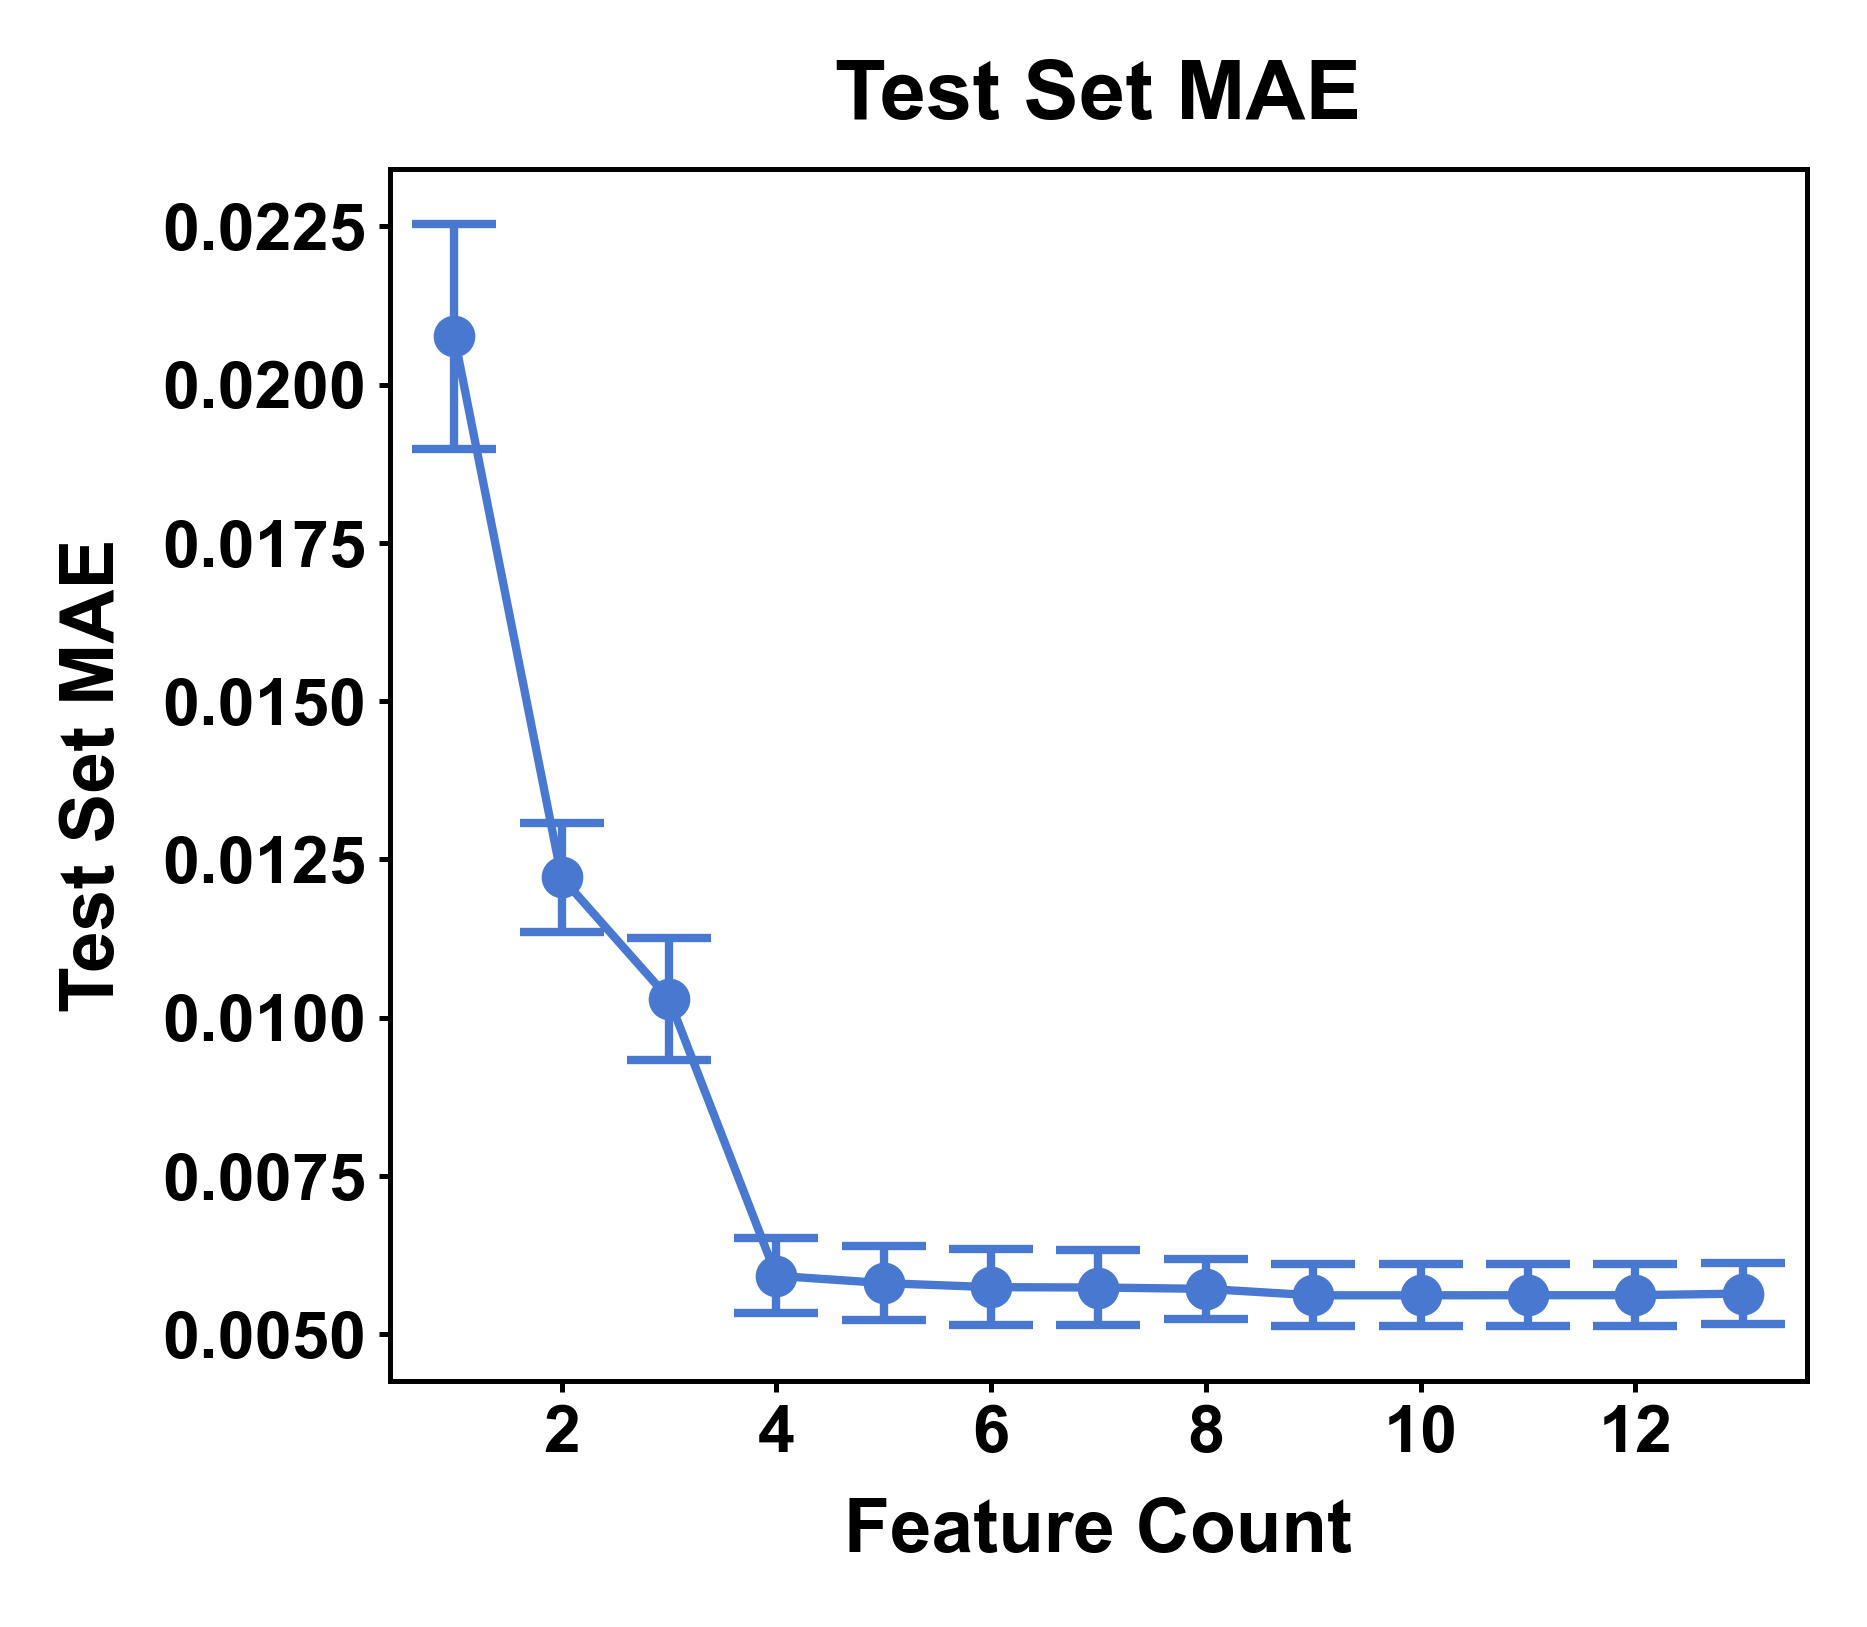

In [19]:


#plt.plot(df_results['n_features'], df_results['final_mae_mean'], marker='o')
plt.errorbar(
    df_results['n_features'],
    df_results['test_mae_mean'],
    yerr=df_results['test_mae_std'],
    fmt='-o',
    capsize=5,
    markersize=4,
#    color='navy',
#    ecolor='black',
    label='Test Set MAE'
)
plt.xlabel('Feature Count', fontsize=9)
plt.ylabel('Test Set MAE', fontsize=9)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.title('Test Set MAE', fontweight='bold', fontsize=10)
plt.tight_layout()
plt.savefig('MAE_test.pdf')
#plt.savefig('MAE.tif')
plt.show()

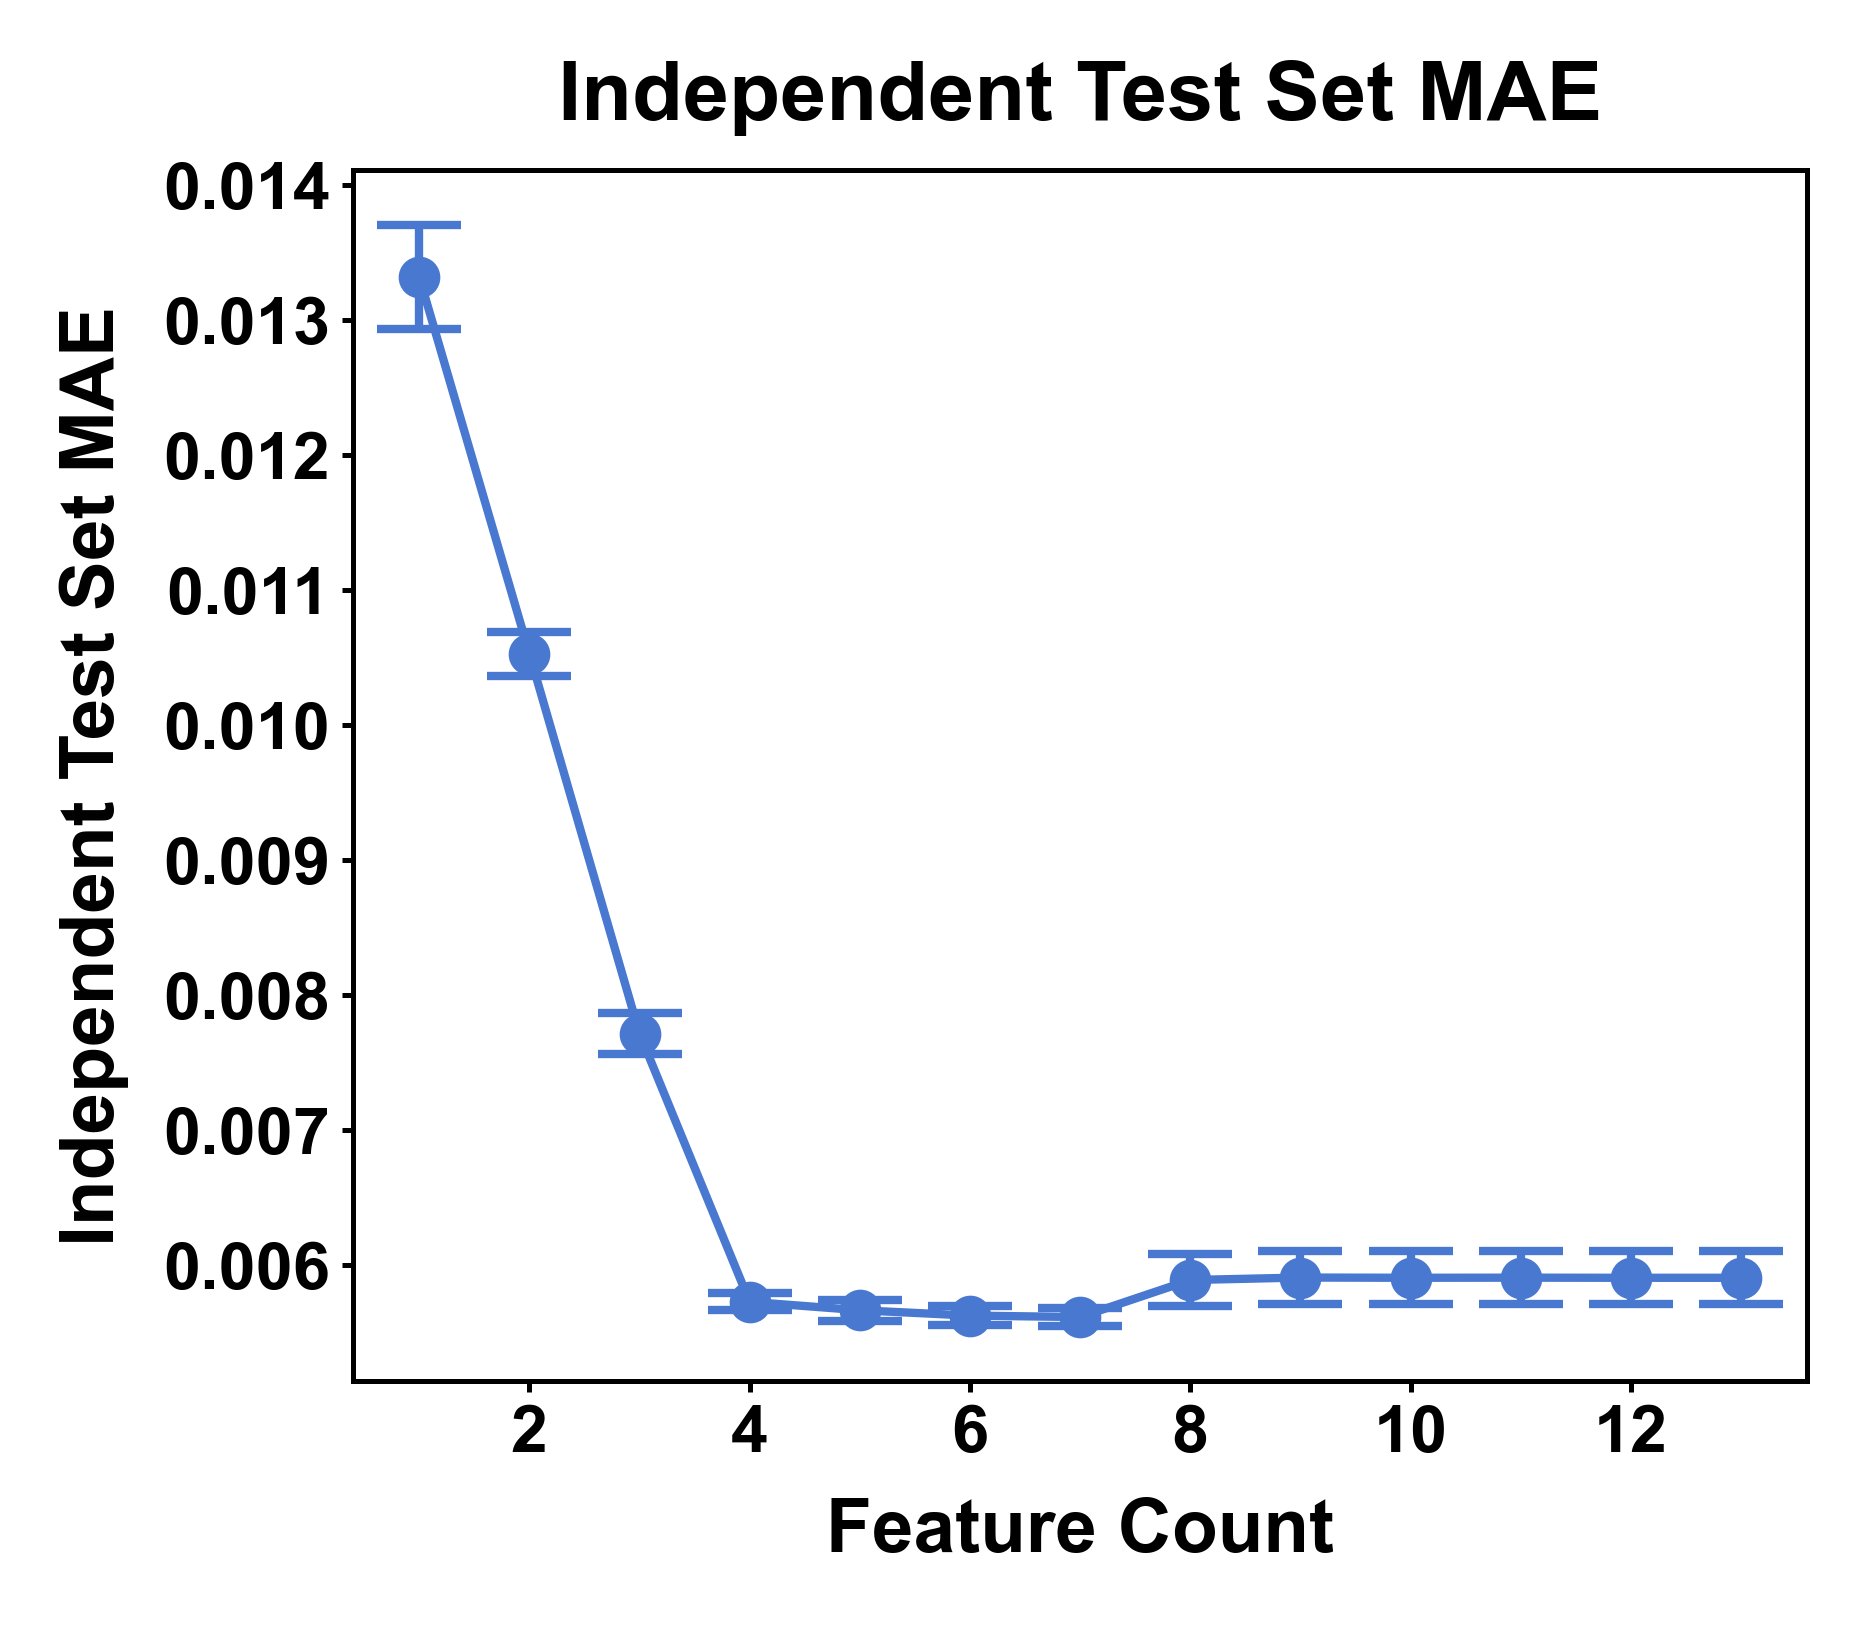

In [20]:


#plt.plot(df_results['n_features'], df_results['final_mae_mean'], marker='o')
plt.errorbar(
    df_results['n_features'],
    df_results['independent_mae_mean'],              
    yerr=df_results['independent_mae_std'],        
    fmt='-o',                                  
    capsize=5,                                  
    markersize=4,                       
#    color='navy',                           
#    ecolor='black',                         
    label='Test Set MAE'
)
plt.xlabel('Feature Count', fontsize=9)
plt.ylabel('Independent Test Set MAE', fontsize=9)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.title('Independent Test Set MAE', fontweight='bold', fontsize=10)
plt.tight_layout()
plt.savefig('MAE_inde.pdf')
#plt.savefig('MAE.tif')
plt.show()

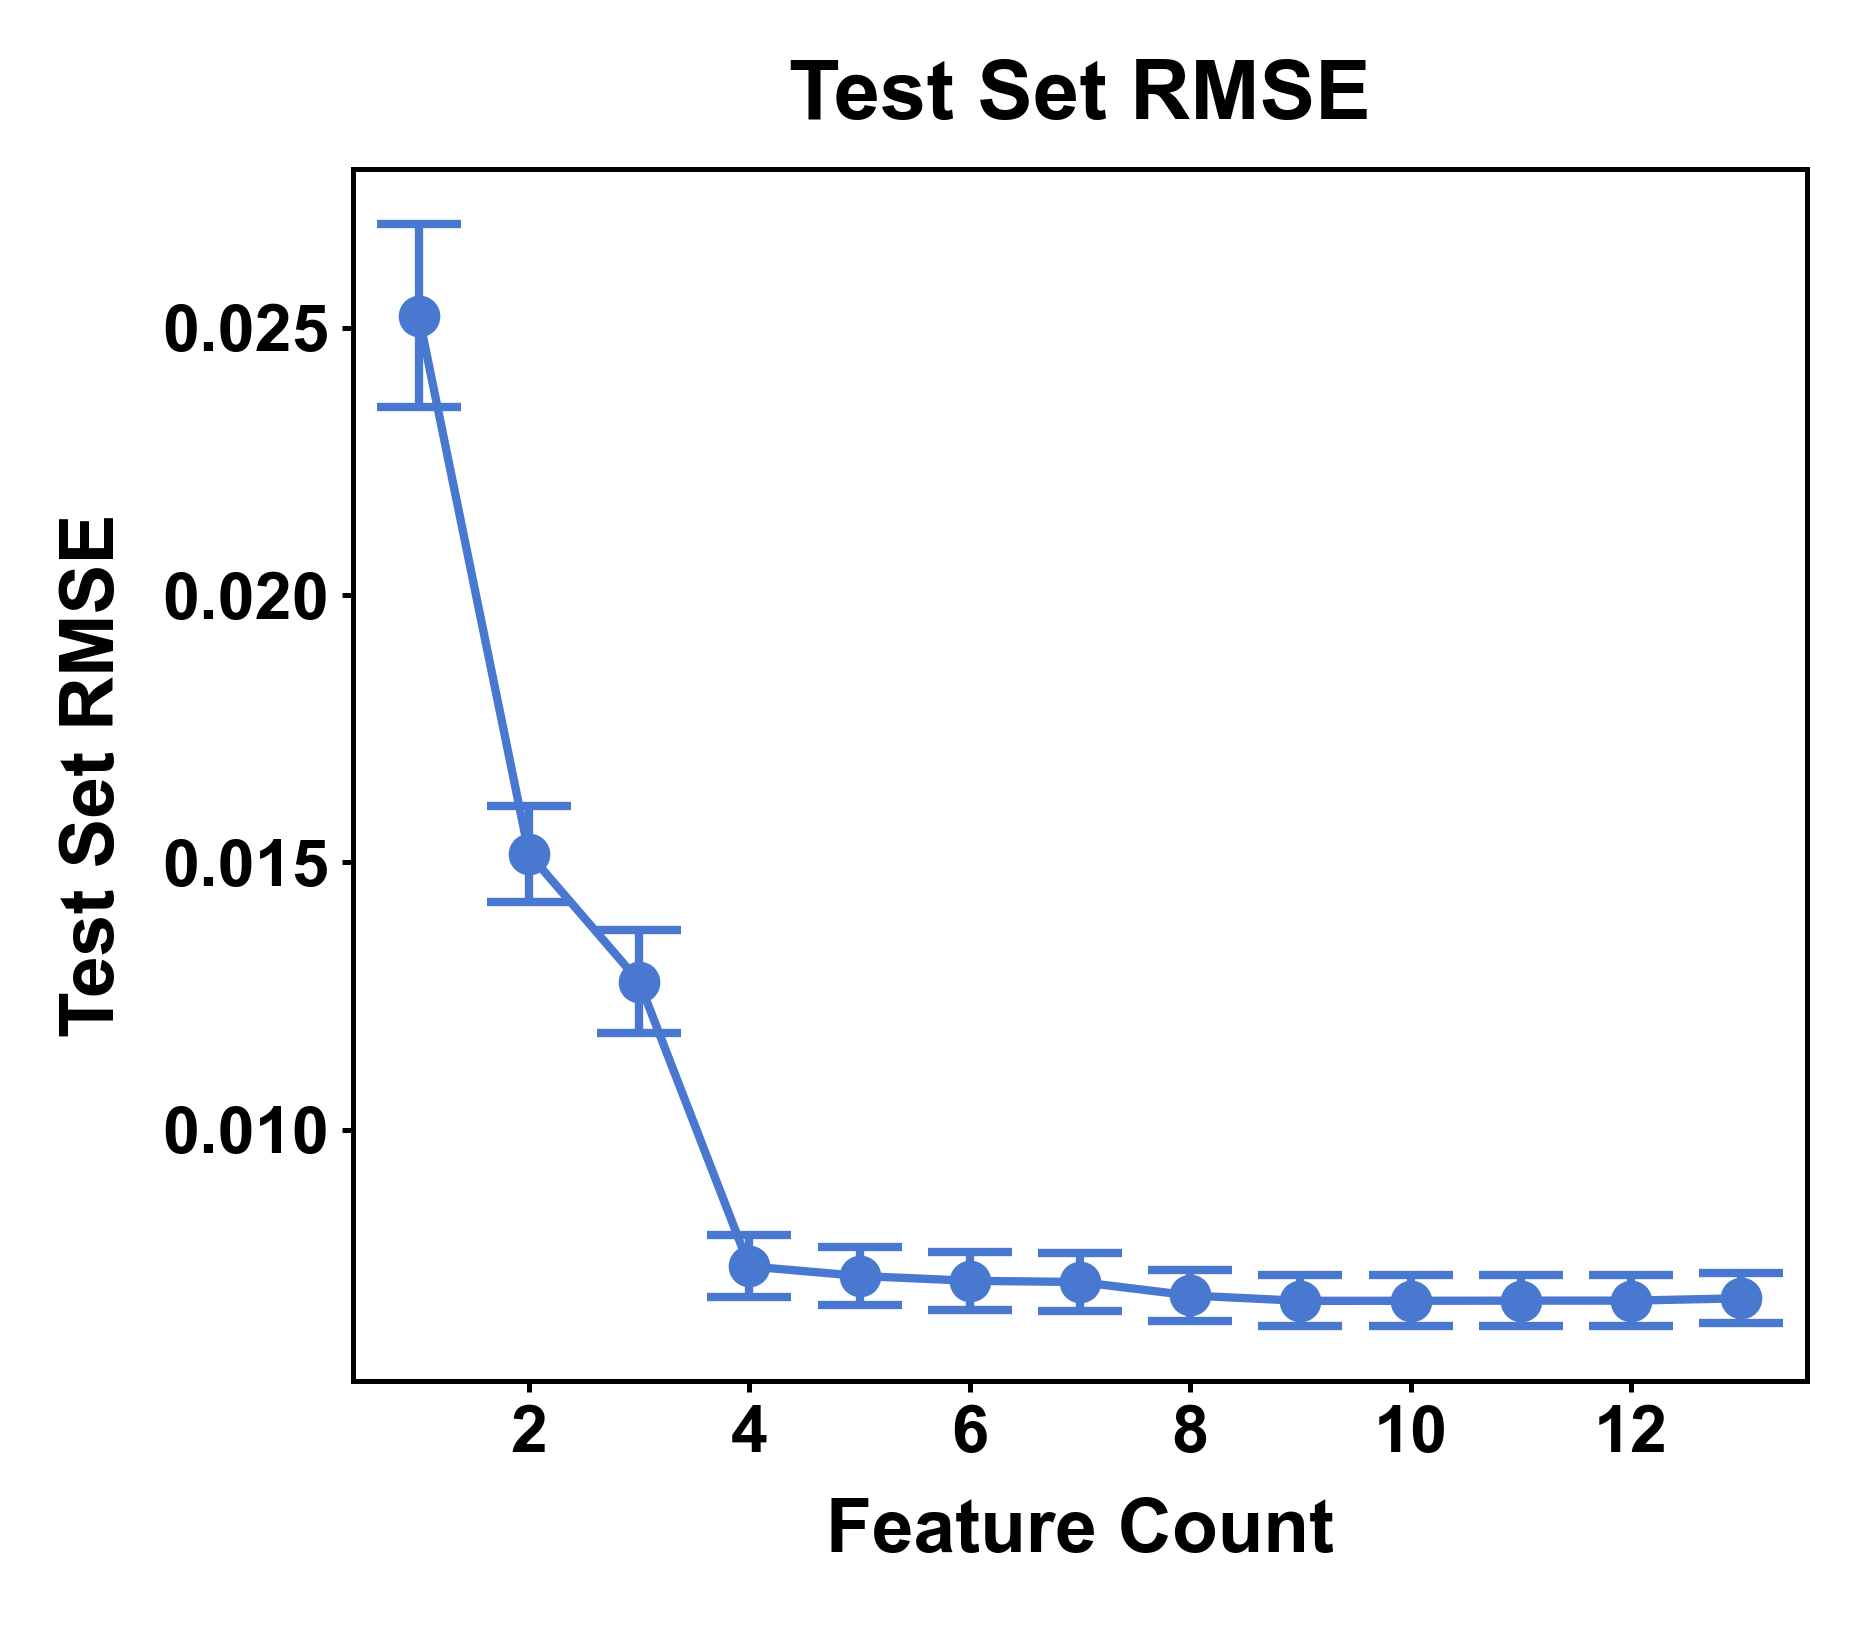

In [21]:


#plt.plot(df_results['n_features'], df_results['final_rmse_mean'], marker='o')
plt.errorbar(
    df_results['n_features'],               
    df_results['test_rmse_mean'],             
    yerr=df_results['test_rmse_std'],           
    fmt='-o',                                   
    capsize=5,                                 
    markersize=4,                             
#    color='navy',                           
#    ecolor='black',                       
    label='Test Set RMSE'
)
plt.xlabel('Feature Count', fontsize=9)
plt.ylabel('Test Set RMSE', fontsize=9)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.title('Test Set RMSE', fontweight='bold', fontsize=10)
plt.tight_layout()
plt.savefig('RMSE_test.pdf')
#plt.savefig('RMSE.tif')
plt.show()

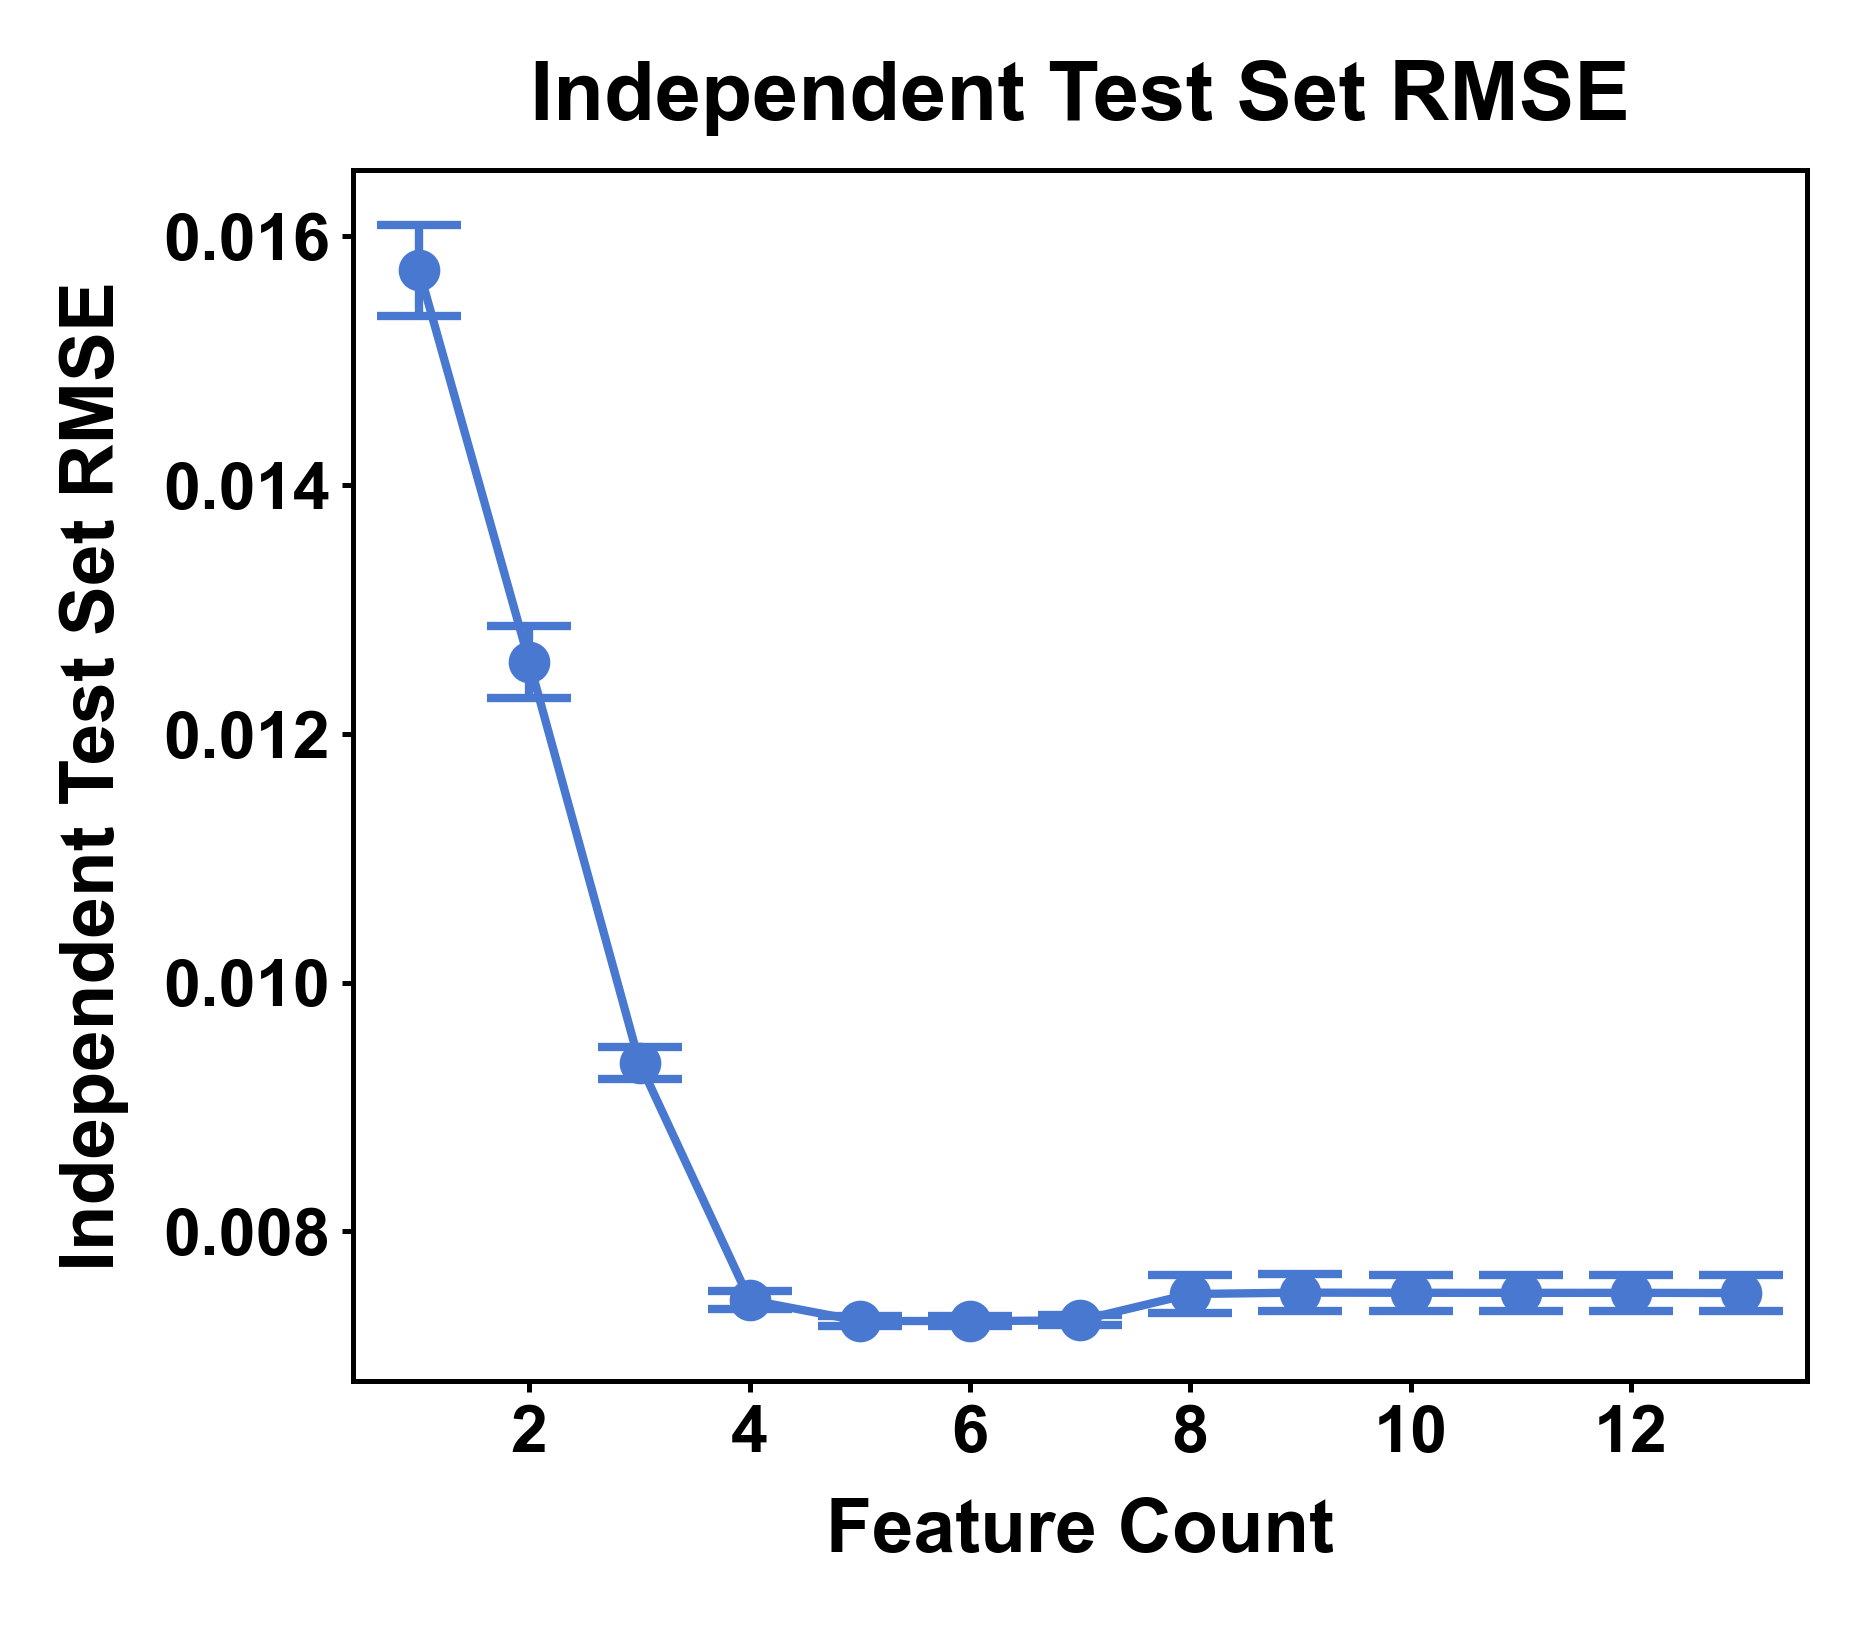

In [22]:

#plt.plot(df_results['n_features'], df_results['final_rmse_mean'], marker='o')
plt.errorbar(
    df_results['n_features'],              
    df_results['independent_rmse_mean'],              
    yerr=df_results['independent_rmse_std'],         
    fmt='-o',                               
    capsize=5,                               
    markersize=4,                      
#    color='navy',                           
#    ecolor='black',                    
    label='Independent Test Set RMSE'
)
plt.xlabel('Feature Count', fontsize=9)
plt.ylabel('Independent Test Set RMSE', fontsize=9)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.title('Independent Test Set RMSE', fontweight='bold', fontsize=10)
plt.tight_layout()
plt.savefig('RMSE_inde.pdf')
#plt.savefig('RMSE.tif')
plt.show()

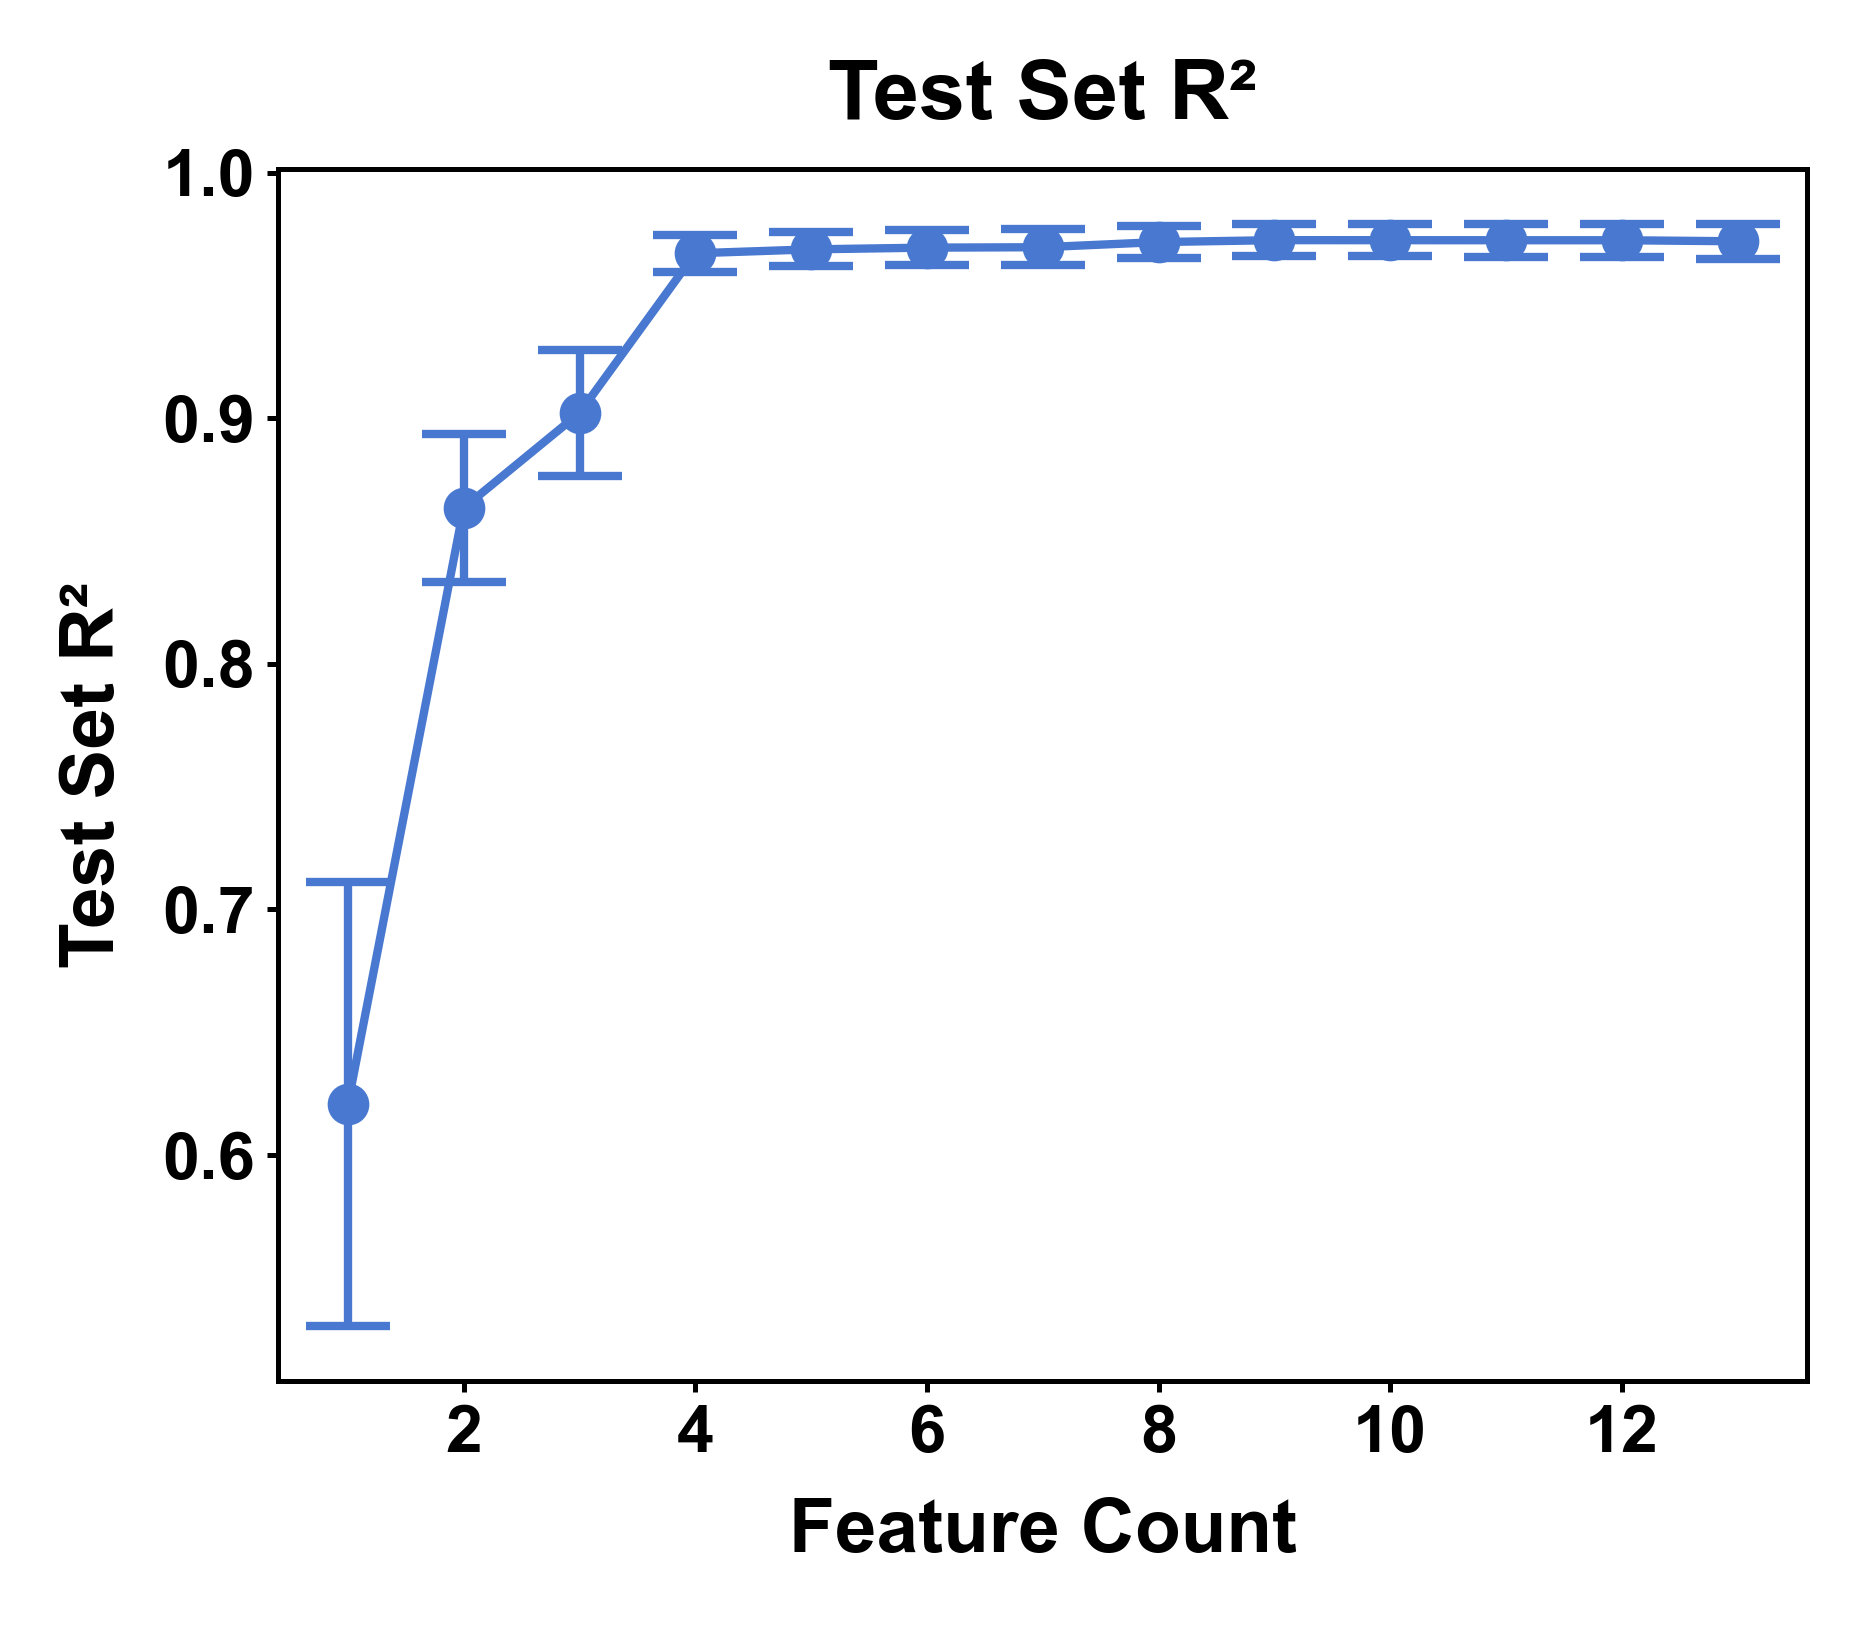

In [23]:


#plt.plot(df_results['n_features'], df_results['final_r2_mean'], marker='o')
plt.errorbar(
    df_results['n_features'],                
    df_results['test_r2_mean'],            
    yerr=df_results['test_r2_std'],             
    fmt='-o',                                
    capsize=5,                                 
    markersize=4,                            
#    color='navy',                          
#    ecolor='black',                           
    label='Test Set R²'
)
plt.xlabel('Feature Count', fontsize=9)
plt.ylabel('Test Set R²', fontsize=9)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.title('Test Set R²', fontweight='bold', fontsize=10)
plt.tight_layout()
plt.savefig('R²_test.pdf')
#plt.savefig('R².tif')
plt.show()

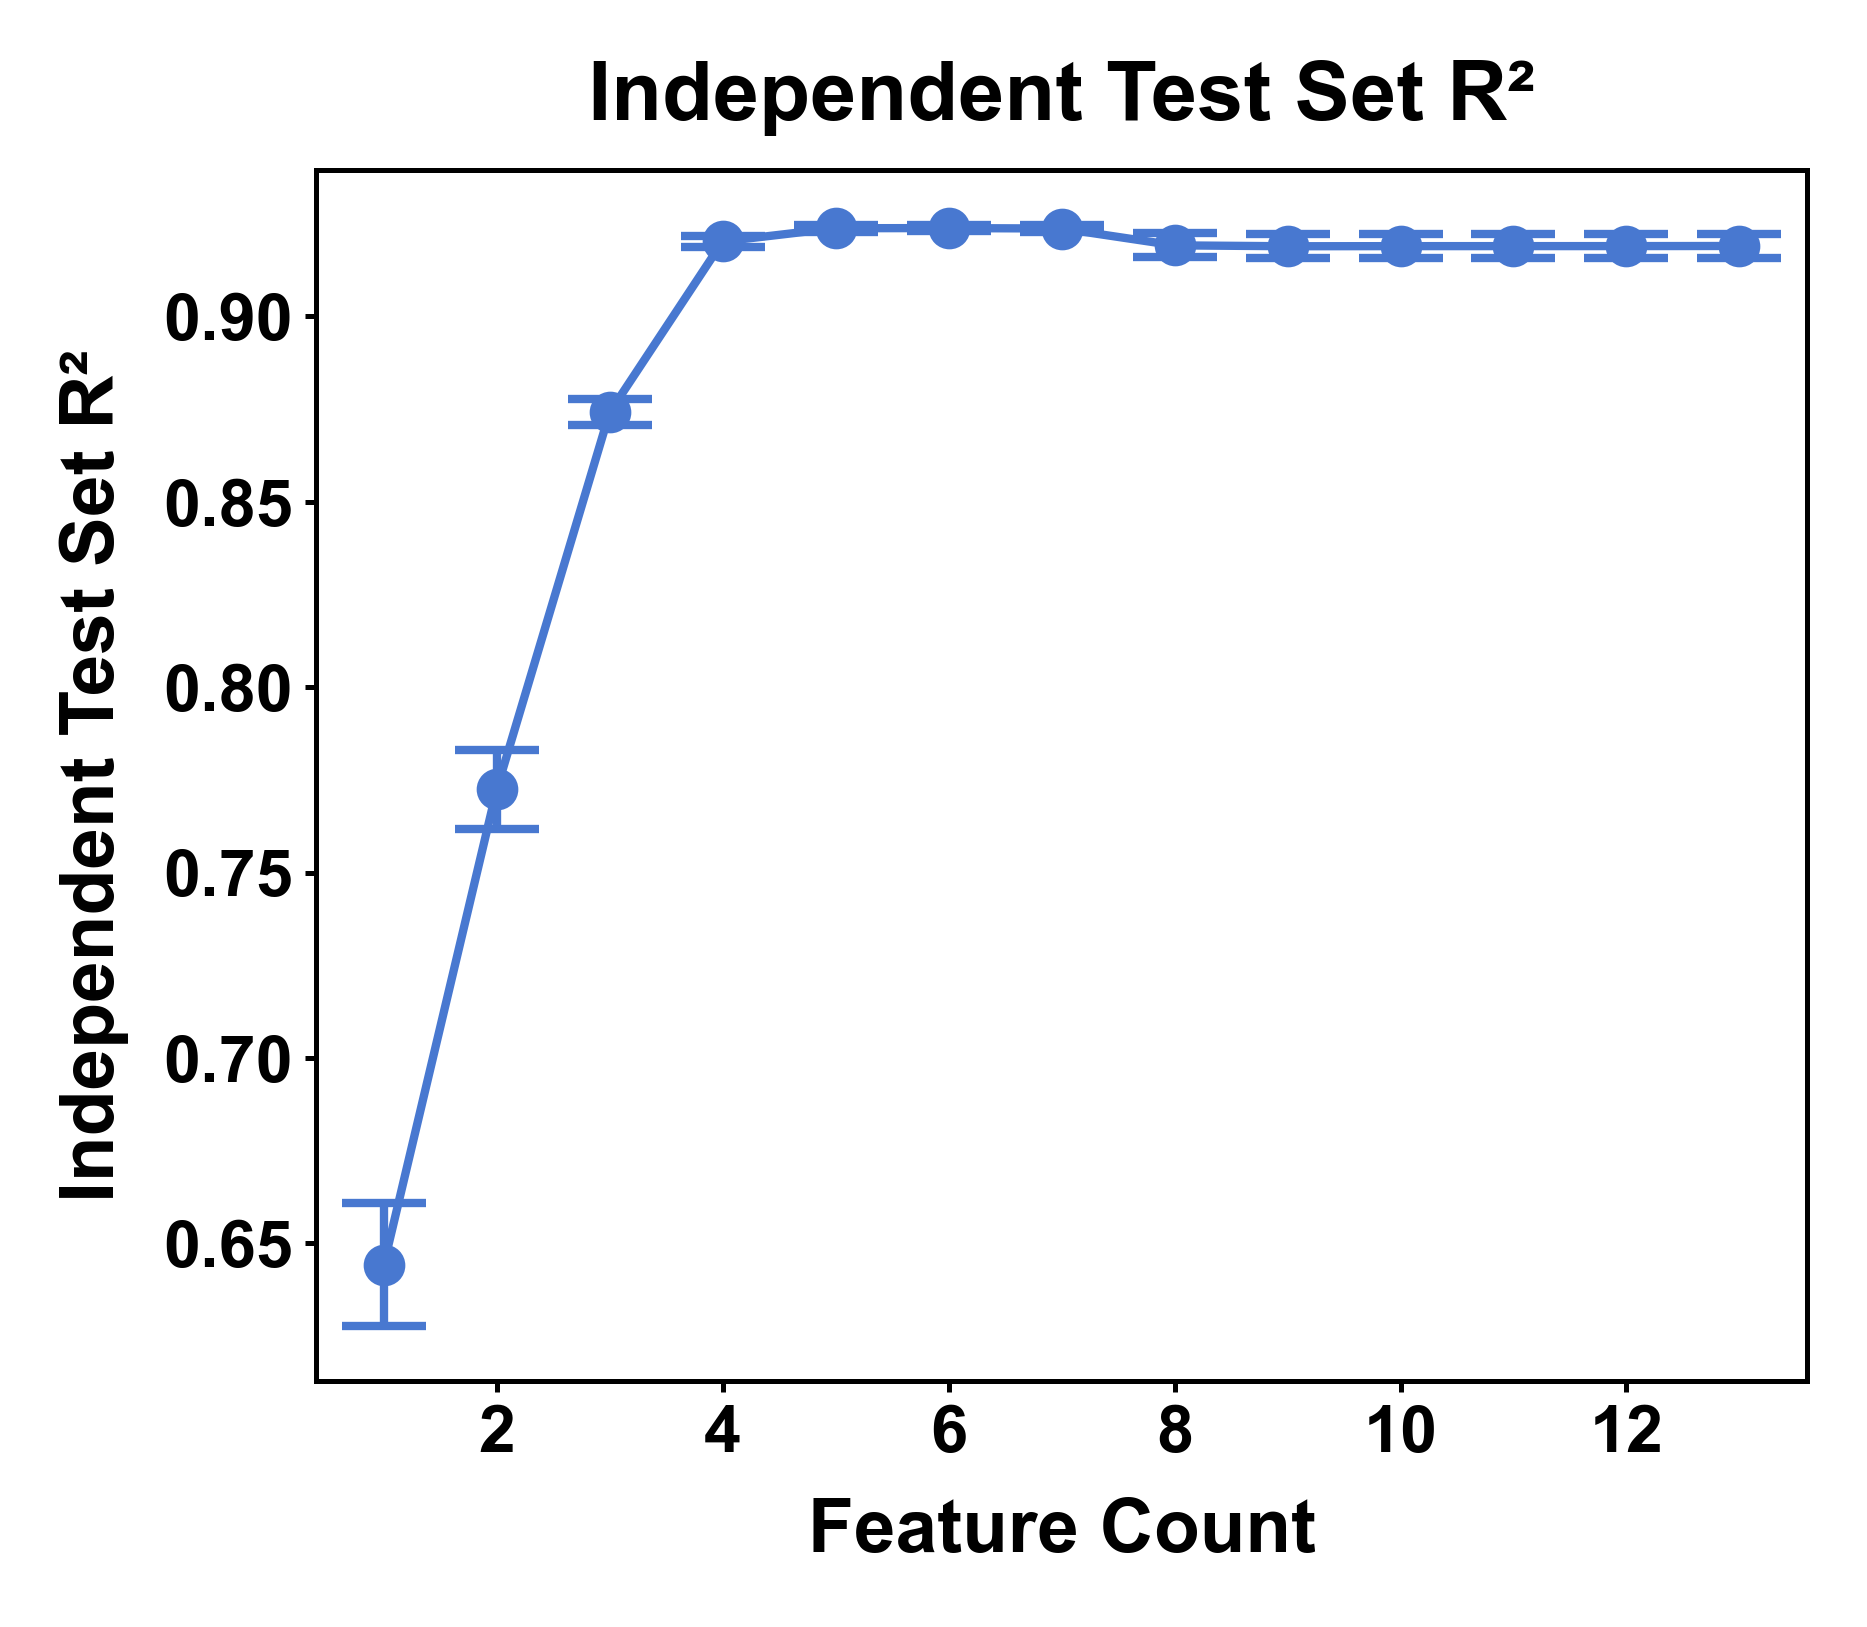

In [24]:


#plt.plot(df_results['n_features'], df_results['final_r2_mean'], marker='o')
plt.errorbar(
    df_results['n_features'],               
    df_results['independent_r2_mean'],           
    yerr=df_results['independent_r2_std'],         
    fmt='-o',                            
    capsize=5,                              
    markersize=4,                       
#    color='navy',                        
#    ecolor='black',                        
    label='Independent Test Set R²'
)
plt.xlabel('Feature Count', fontsize=9)
plt.ylabel('Independent Test Set R²', fontsize=9)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.title('Independent Test Set R²', fontweight='bold', fontsize=10)
plt.tight_layout()
plt.savefig('R²_inde.pdf')
#plt.savefig('R².tif')
plt.show()